In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as PP
import numpy as np
import sys
import glob
import cv2
import os
import xarray as xr
import cartopy.crs as ccrs


ALG 0: $\sim$1400

ALG 1:    1431 seconds with 10 nodes  (~35,500 cases)



## """ Find AR track ids from figure names """

track_figures = glob.glob("output/figures/*.png")

track_id = []
for t in track_figures:
    track_id.append(t.split("_")[1])

track_id = np.sort(np.unique(track_id))
track_id_int = track_id.astype("int")
track_id_int


In [2]:
# track_figures = np.array(track_figures)
# track_figures


In [3]:
# def find_tracks(track):
    
#     tid = track_id[track]
#     return np.sort([i for i in track_figures if tid in i])    
        

In [4]:
# tracks = find_tracks(0)
# tracks


In [5]:
# i=1000

# execution = "module load ffmpeg; ffmpeg -framerate 1 -pattern_type glob -i 'output/figures/AR_" + \
#               track_id[i] + "_*.png'  -c:v libx264 -r 30 -pix_fmt yuv420p output/videos/out" + \
#               track_id[i] + ".mp4"
# print(execution)
# os.system(execution)


In [6]:
# from IPython.display import Video

# fName = "output/videos/out{}.mp4".format(track_id[i])
# Video(fName, width=450, height=350)


In [275]:
# f.close()

In [331]:
f=xr.open_dataset("output/output_table.nc")
f


<xarray.Dataset>
Dimensions:   (ar_id: 24933)
Coordinates:
  * ar_id     (ar_id) int32 -2147483648 -2147483648 ... 79720215 79720215
Data variables: (12/13)
    track_id  (ar_id) int32 ...
    time      (ar_id) float64 ...
    lat       (ar_id) float64 ...
    lon       (ar_id) float64 ...
    life      (ar_id) int32 ...
    stage     (ar_id) int32 ...
    ...        ...
    width     (ar_id) float64 ...
    area      (ar_id) float64 ...
    d0        (ar_id) float64 ...
    ivt0      (ar_id) float64 ...
    d1        (ar_id) float64 ...
    ivt1      (ar_id) float64 ...
Attributes:
    TECA_VERSION_DESCR:  4.1.0
    APP_NAME:            python3.8

In [332]:
print(len(f.lon))
f.lon[80:160]

24933


<xarray.DataArray 'lon' (ar_id: 80)>
array([ 12.      ,  12.      ,  12.      ,  45.      ,  12.      ,  12.      ,
        12.      ,  12.      ,  12.      ,  12.      ,  12.      ,  12.      ,
        12.      ,  12.      , 235.125   ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 219.375   , 203.625   , 187.875   ,
       172.125   , 156.375   , 140.625   , 124.875   ,   6.168194,  -9.532664,
       -25.233514, -40.934338,  28.      ,  28.      ,  28.      ,  28.      ,
        28.      ,  28.      ,  28.      ,  28.      ,  28.      ,  28.      ,
        28.      ,  28.      , -56.635092,  28.      ,  28.      ,  28.      ,
        28.      ,  28.      ,  28.      ,  28.      ,  28.      ,  28.      ,
        28.      ,        nan,  16.      ,  16.      ,  16.      ,  16.      ,
        16.      ,  16.      ,  16.      ,  16.      ,  16.      ,  16.      ,
              nan,  16.      ,        nan,        nan,        nan,        nan,
       139.5     , 123.75    ])
Coordinates:
  * ar_id    (ar_id) int32 -2147483648 -2147483648 ... -2147483648 -2147483648

In [333]:
len(np.where(np.isnan(f.lon))[0])

6317

In [334]:
len(np.where(np.logical_not(np.isnan(f.lon)))[0])

18616

In [335]:
len(np.where(np.logical_not(np.isnan(f.lon)))[0])+len(np.where(np.isnan(f.lon))[0])

24933

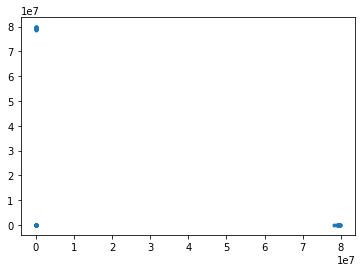

In [336]:
fig,ax=PP.subplots()

ax.plot(f.lon,f.lat,'.')


In [7]:
# f1.close()
# f0.close()

In [337]:
f0=xr.open_dataset("output/runs/cmip5_CSIRO-Mk3-6-0_historical_alg0.nc")
f0


<xarray.Dataset>
Dimensions:   (track_id: 292059)
Coordinates:
  * track_id  (track_id) int32 0 1 2 3 5 ... 299947 299948 299949 299950 299951
Data variables:
    ar_id     (track_id) int32 ...
    time      (track_id) datetime64[ns] ...
    lat       (track_id) float64 ...
    lon       (track_id) float64 ...
    life      (track_id) int32 ...
    stage     (track_id) int32 ...
    length    (track_id) float64 ...
    width     (track_id) float64 ...
    area      (track_id) float64 ...
Attributes:
    TECA_VERSION_DESCR:  4.1.0
    APP_NAME:            python3.8

In [338]:
""" Number of ARs """

ARs = len(np.unique(f0.ar_id))
print("{} ARs analyzed".format(ARs))


22188 ARs analyzed


In [339]:
""" AR identifier """

AR_id = f0.ar_id.values
AR_unique_id = np.unique(AR_id)


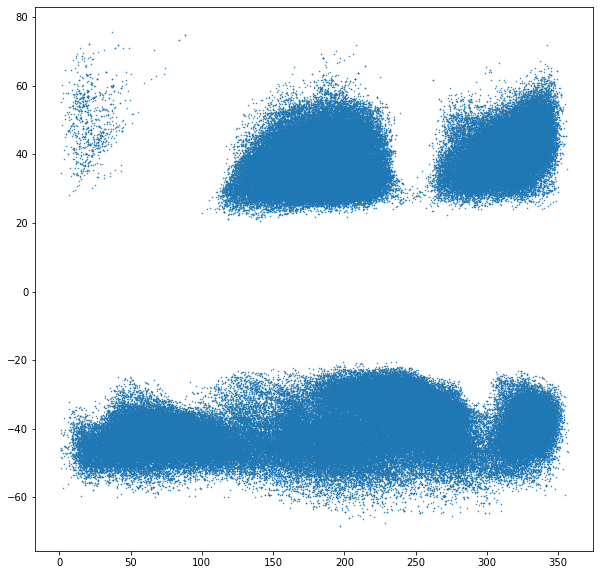

In [340]:
# fig=PP.figure(figsize=(10,10))
# coords = projection=ccrs.PlateCarree()
# proj   = projection=ccrs.Robinson(central_longitude=-180)
# res = '110m'
# ax = fig.add_subplot(projection=proj)
# # ax.set_extent([-180., 180., -90, 90])#, crs=proj)
# ax.set_global()
# ax.coastlines(resolution=res, alpha=0.5)

# for i in AR_unique_id:
# #     ax.plot(f0.sel(ar_id=i).lon, f0.lat.sel(ar_id=i), '.', transform=coords)
#     ind = np.where(f0.ar_id==i)[0]
#     ax.plot(f0.lon[ind], f0.lat[ind], '.', transform=coords)

fig,ax=PP.subplots(figsize=(10,10))
ax.plot(f0.lon, f0.lat, '.',markersize=1)



In [341]:
# f1.close()
f1 = xr.open_dataset("output/runs/cmip5_CSIRO-Mk3-6-0_historical_alg1.nc")
f1


<xarray.Dataset>
Dimensions:   (track_id: 2463595)
Coordinates:
  * track_id  (track_id) int32 0 0 0 0 0 ... 299948 299948 299948 299948 299948
Data variables:
    ar_id     (track_id) int32 ...
    time      (track_id) float64 ...
    d0        (track_id) float64 ...
    ivt0      (track_id) float64 ...
    d1        (track_id) float64 ...
    ivt1      (track_id) float64 ...
    life      (track_id) int32 ...
    stage     (track_id) int32 ...
Attributes:
    TECA_VERSION_DESCR:  4.1.0
    APP_NAME:            python3.8

In [342]:
print(len(np.unique(f0.track_id)), len(np.unique(f1.track_id)))

292059 173474


In [343]:
f1.track_id

<xarray.DataArray 'track_id' (track_id: 2463595)>
array([     0,      0,      0, ..., 299948, 299948, 299948], dtype=int32)
Coordinates:
  * track_id  (track_id) int32 0 0 0 0 0 ... 299948 299948 299948 299948 299948

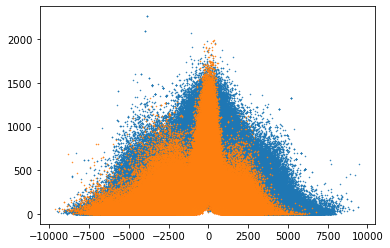

In [344]:
fig,ax=PP.subplots()

p = ax.plot(f1.d0, f1.ivt0,'.', markersize=1)
p = ax.plot(f1.d1, f1.ivt1,'.', markersize=1)
    

In [345]:
from fastkde import fastKDE
import fastKDE_plot_modified as fastkde_plot


In [346]:
def CDF(X,IVT,cdf_levels=[0.045, 0.16, 0.5, 0.84, 0.955], numPoints=None):
    
    bivariate_pdfs, bivariate_axes = fastKDE.conditional(IVT, X ,numPoints=numPoints)
    bivX   = bivariate_axes[0]
    bivIVT = bivariate_axes[1]

    conditionX = np.logical_not((bivX>=np.min(X))&(bivX<=np.max(X)))
    conditionI = np.logical_not((bivIVT>=np.min(IVT))& (bivIVT<=np.max(IVT)))
    
    bivX = np.ma.masked_where(conditionX, bivX)
    bivIVT = np.ma.masked_where(conditionI, bivIVT)
    
    conditionX,conditionI = np.meshgrid(conditionX, conditionI)
    condition = np.logical_or(conditionI, conditionX)
    
    bivariate_pdfs = np.ma.masked_where(condition, bivariate_pdfs)
    
    pdf_to_plot = \
       fastkde_plot.cumulative_integral(bivariate_pdfs,\
                                [bivariate_axes[0],bivariate_axes[1]],integration_axes=1)
#     pdf_to_plot = np.ma.masked_where(condition, pdf_to_plot)

    cdf_ivt_x = \
       np.ma.masked_where(np.logical_not(np.isclose(np.ma.ones(pdf_to_plot.shape) * \
                          pdf_to_plot[-1,:][np.newaxis,:],1.0)),pdf_to_plot)
    cdf_ivt_x = np.ma.masked_where(condition, cdf_ivt_x)
    cdf_ivt_x = np.clip(cdf_ivt_x,0,1)

    return bivX, bivIVT, cdf_ivt_x


In [347]:
#------------------------------------------------------------------------------------------------------
def extract_contours(X,IVT,cdf_levels=[0.045, 0.16, 0.5, 0.84, 0.955]):
    
    fig, axs, marginal_vals, marginal_pdfs, bivariate_pdfs, \
    levels, limits = fastkde_plot.pair_plot([IVT, X], \
                                            conditional=True, var_names=['IVT', 'x'],\
                                            cdf_levels=cdf_levels,auto_show = False)    
    ax0,ax1,ax2,ax3 = axs.ravel()
    
    pdf_contours_x = {}
    pdf_contours_y = {}
    keys = cdf_levels

    for i,col in enumerate(ax1.collections):
        paths = col.get_paths()
        vert = np.array([len(paths[i].vertices.ravel()) for i in range(len(paths))]).argmax()
        v = paths[vert].vertices
        x = v[:,0]
        y = v[:,1]
        pdf_contours_x[keys[i]] = x
        pdf_contours_y[keys[i]] = y
    
    return pdf_contours_x, pdf_contours_y


In [348]:
#--------------------------------------------------------------------------------------
def plot_CDF_contours(xContours0, yContours0, xContours1, yContours1,\
                      cdf_levels=[0.045, 0.16, 0.5, 0.84, 0.955], ivtBK = None):   
    
    IVT, DIST = [yContours0,yContours1],[xContours0,xContours1]
#     IVT, DIST = [yContours0],[xContours0]
    minIVT, maxIVT = -100, 2000

    xLimits  = [[-4500,4500],[-2000,2000]]
    XTICKS = [[-4000, -3000, -2000, 0, 2000, 3000, 4000], [-2000, -1500, -1000, 0, 1000, 1500,  2000]]
    PC_names = ["Along","Across"]
    
    measures = ["Length={:.0f} km","Width={:.0f} km"]
    textX = [-4200, -1850]
    textY = 1750
    
    fig,axs=PP.subplots(1,2,figsize=(12,4))
    ax0,ax1=axs
#     fig,ax=PP.subplots(figsize=(6,4))
#     axs = [ax]
    
    pCritic = 0.16
    ivtBK = 200
    
    for i,ax in enumerate(axs):
        
        for k in cdf_levels:
            ax.plot(DIST[i][k],IVT[i][k], label="p="+str(k))

        left, right = xroots_from_ivt(DIST[i][pCritic], IVT[i][pCritic], ivtBK)
        boundaries = [left,right]
        size = np.abs(left-right)
        text = measures[i]
        ax.text(textX[i], textY, text.format(size), fontsize=12)
        
        xticks = np.sort(np.concatenate((XTICKS[i],boundaries))).astype("int")
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks,rotation=90)
        
        yticks = np.array([0,ivtBK, 500, 1000, 1500, 2000],dtype="int")
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticks)
        
        ax.set_xlim(xLimits[i])
        ax.set_ylim(minIVT,maxIVT)
        
        xdum = np.linspace(xLimits[i][0],xLimits[i][1],11)
        ydum = xdum*0 + ivtBK
       
        ax.plot(xdum, ydum, "--k", alpha = 0.75, linewidth=0.9, label = "Background IVT")
        ax.plot([boundaries[0],boundaries[0]],[minIVT,maxIVT], "--k", alpha = 0.4, linewidth=1)
        ax.plot([boundaries[1],boundaries[1]],[minIVT,maxIVT], "--k", alpha = 0.4, linewidth=1)
        
        ax.set_xlabel("Distance to AR centroid [km] ({} AR)".format(PC_names[i]))
        ax.set_ylabel("IVT CDF [kg m$^{-1}$s$^{-1}$]")
        ax.grid(alpha=0.15)
        ax.legend(fontsize=10,loc=1)
  
    fig.tight_layout()

    return


In [349]:
#--------------------------------------------------------------------------------------
def xroots_from_ivt(x, ivt, ivtBK):
        
    roots = x[np.gradient(np.sign(ivt-ivtBK)).astype("bool")]
    left  = roots[roots<0].mean()
    right = roots[roots>0].mean()
     
    return left, right


In [350]:
bivX0, bivIVT0, cdf_ivt_x0 = CDF(f1.d0.values, f1.ivt0.values)
bivX1, bivIVT1, cdf_ivt_x1 = CDF(f1.d1.values, f1.ivt1.values)

pdfx0,pdfy0 = extract_contours(f1.d0.values, f1.ivt0.values)
pdfx1,pdfy1 = extract_contours(f1.d1.values, f1.ivt1.values)


/global/homes/i/indah/.conda/envs/climate_py38/lib/python3.8/site-packages/fastkde/fastKDE.py:775: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dxProd = dxProd[cslice[::-1]]
/global/homes/i/indah/.conda/envs/climate_py38/lib/python3.8/site-packages/fastkde/fastKDE.py:775: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dxProd = dxProd[cslice[::-1]]


(0.0, 1400.0)

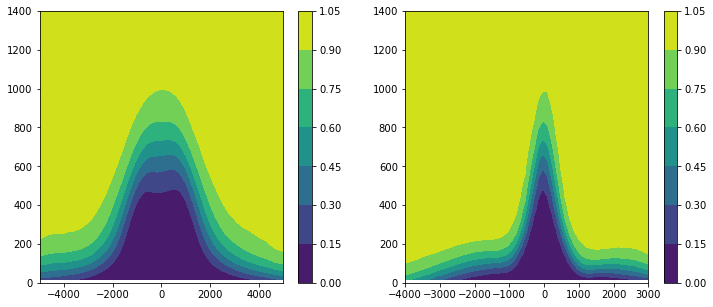

In [351]:
fig,axs=PP.subplots(1,2,figsize=(12,5))
ax0,ax1=axs

cf0=ax0.contourf(bivX0, bivIVT0, cdf_ivt_x0)
cb0=fig.colorbar(cf0,ax=ax0)
ax0.set_xlim(-5000,5000)
ax0.set_ylim(0,1400)

cf1=ax1.contourf(bivX1, bivIVT1, cdf_ivt_x1)
cb1=fig.colorbar(cf1,ax=ax1)
ax1.set_xlim(-4000,3000)
ax1.set_ylim(0,1400)


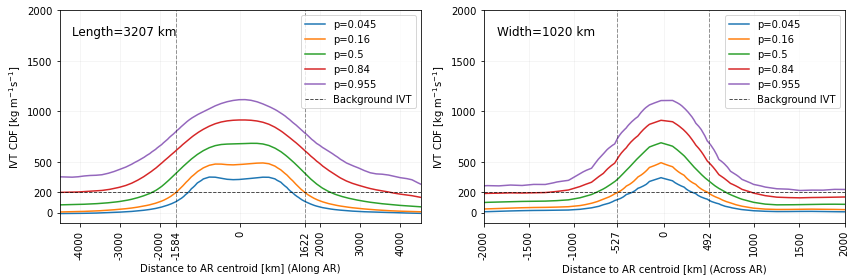

In [352]:
plot_CDF_contours(pdfx0,pdfy0,pdfx1,pdfy1)


In [353]:
stage = (f1.stage/f1.life).values
d0,ivt0 = f1.d0.values, f1.ivt0.values
d1,ivt1 = f1.d1.values, f1.ivt1.values


In [354]:
stage_keys = (100*np.arange(0.1, 1.0, 0.1)).astype("int")
inds = {}
for k in stage_keys:
    inds[k] = np.where((stage>=float(k)/100-.03)&(stage<=float(k)/100+0.03))[0]


In [355]:
stage_keys


array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [356]:
inds.keys()


dict_keys([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [357]:
PDFX0,PDFY0 = {},{}
PDFX1,PDFY1 = {},{}

for k in stage_keys:

    x0,y0 = extract_contours(d0[inds[k]], ivt0[inds[k]], cdf_levels=[0.5])
    x1,y1 = extract_contours(d1[inds[k]], ivt1[inds[k]], cdf_levels=[0.5])
    PDFX0[k],PDFY0[k] = x0,y0
    PDFX1[k],PDFY1[k] = x1,y1
    

/global/homes/i/indah/.conda/envs/climate_py38/lib/python3.8/site-packages/fastkde/fastKDE.py:775: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dxProd = dxProd[cslice[::-1]]
/global/homes/i/indah/.conda/envs/climate_py38/lib/python3.8/site-packages/fastkde/fastKDE.py:775: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dxProd = dxProd[cslice[::-1]]
/global/homes/i/indah/.conda/envs/climate_py38/lib/python3.8/site-packages/fastkde/fastKDE.py:775: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr

In [358]:
#--------------------------------------------------------------------------------------
def plot_mean_cdf_stages(xContours0, yContours0, xContours1, yContours1):   
    
    IVT, DIST = [yContours0,yContours1],[xContours0,xContours1]
#     IVT, DIST = [yContours0],[xContours0]
    minIVT, maxIVT = 0, 850

    xLimits  = [[-4500,4500],[-2000,2000]]
    XTICKS = [[-4000, -3000, -2000, 0, 2000, 3000, 4000], [-2000, -1500, -1000, 0, 1000, 1500,  2000]]
    PC_names = ["Along","Across"]
    
    measures = ["Length={:.0f} km","Width={:.0f} km"]
    textX = [-4200, -1850]
    textY = 1750
    
    fig,axs=PP.subplots(1,2,figsize=(12,4))
    ax0,ax1=axs
    
    pCritic = 0.5
    ivtBK = 200

    colors = mpl.cm.jet(np.linspace(0,1,len(stage_keys)))
    
    for i,ax in enumerate(axs):
        
        for j,k in enumerate(stage_keys):
#         for k in [10,30,50,70,90]:
            ax.plot(DIST[i][k][0.5],IVT[i][k][0.5], label="s = "+str(k), color=colors[j],\
                    linewidth=0.75)

#         left, right = xroots_from_ivt(DIST[i][pCritic], IVT[i][pCritic], ivtBK)
#         boundaries = [left,right]
#         size = np.abs(left-right)
#         text = measures[i]
#         ax.text(textX[i], textY, text.format(size), fontsize=12)
        
#         xticks = np.sort(np.concatenate((XTICKS[i],boundaries))).astype("int")
#         ax.set_xticks(xticks)
#         ax.set_xticklabels(xticks,rotation=90)
        
#         yticks = np.array([0,ivtBK, 500, 1000, 1500, 2000],dtype="int")
#         ax.set_yticks(yticks)
#         ax.set_yticklabels(yticks)
        
        ax.set_xlim(xLimits[i])
        ax.set_ylim(minIVT,maxIVT)
        
#         xdum = np.linspace(xLimits[i][0],xLimits[i][1],11)
#         ydum = xdum*0 + ivtBK
       
#         ax.plot(xdum, ydum, "--k", alpha = 0.75, linewidth=0.9, label = "Background IVT")
#         ax.plot([boundaries[0],boundaries[0]],[minIVT,maxIVT], "--k", alpha = 0.4, linewidth=1)
#         ax.plot([boundaries[1],boundaries[1]],[minIVT,maxIVT], "--k", alpha = 0.4, linewidth=1)
        
        ax.set_xlabel("Distance to AR centroid [km] ({} AR)".format(PC_names[i]))
        ax.set_ylabel("IVT CDF [kg m$^{-1}$s$^{-1}$]")
        ax.grid(alpha=0.15)
        ax.legend(fontsize=10,loc=1)
        ax.set_title("Life cycle stage {} AR".format(PC_names[i]))
  
    fig.tight_layout()

    return

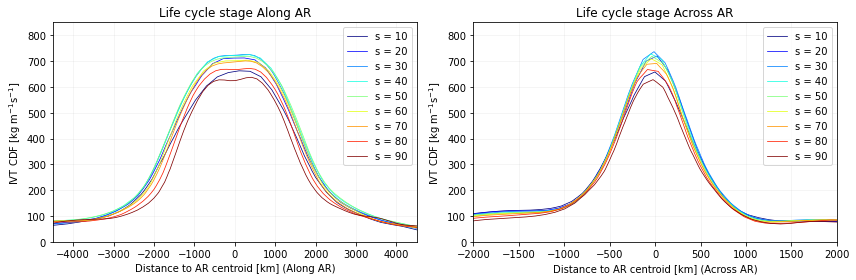

In [359]:
plot_mean_cdf_stages(PDFX0,PDFY0,PDFX1,PDFY1)


plot ivt conditional median with distance for all ARs at a given lifecycle stage (code by color)
maybe animate



25, 50, 75   + full 



In [14]:
models

array(['6hrLev_BCC-CSM2-MR_historical', '6hrLev_BCC-CSM2-MR_ssp585',
       '6hrLev_CCSM4_historical', '6hrLev_CCSM4_rcp85',
       '6hrLev_CSIRO-Mk3-6-0_historical', '6hrLev_CSIRO-Mk3-6-0_rcp85',
       '6hrLev_CanESM2_historical', '6hrLev_CanESM2_rcp85',
       '6hrLev_IPSL-CM5A-LR_historical', '6hrLev_IPSL-CM5A-LR_rcp85',
       '6hrLev_IPSL-CM5B-LR_historical', '6hrLev_IPSL-CM5B-LR_rcp85',
       '6hrLev_IPSL-CM6A-LR_historical', '6hrLev_IPSL-CM6A-LR_ssp585',
       '6hrLev_MRI-ESM2-0_historical', '6hrLev_MRI-ESM2-0_ssp585',
       '6hrLev_NorESM1-M_historical', '6hrLev_NorESM1-M_rcp85'],
      dtype='<U87')

## Analyze data for all runs and models

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as PP
import numpy as np
import sys
import glob
import cv2
import os
import xarray as xr
import cartopy.crs as ccrs


In [2]:
models = ['6hrLev_CCSM4_historical', '6hrLev_CCSM4_rcp85',\
          '6hrLev_CSIRO-Mk3-6-0_historical', '6hrLev_CSIRO-Mk3-6-0_rcp85',\
          '6hrLev_CanESM2_historical', '6hrLev_CanESM2_rcp85',\
          '6hrLev_IPSL-CM5A-LR_historical', '6hrLev_IPSL-CM5A-LR_rcp85',\
          '6hrLev_IPSL-CM5B-LR_historical', '6hrLev_IPSL-CM5B-LR_rcp85',\
          '6hrLev_NorESM1-M_historical', '6hrLev_NorESM1-M_rcp85',\
          '6hrLev_BCC-CSM2-MR_historical', '6hrLev_BCC-CSM2-MR_ssp585',\
          '6hrLev_IPSL-CM6A-LR_historical', '6hrLev_IPSL-CM6A-LR_ssp585',
          '6hrLev_MRI-ESM2-0_historical', '6hrLev_MRI-ESM2-0_ssp585']

In [1]:
# Define runs
runs = ['cmip5_CCSM4_historical',
 'cmip5_CCSM4_rcp85',
 'cmip5_CSIRO-Mk3-6-0_historical',
 'cmip5_CSIRO-Mk3-6-0_rcp85',
 'cmip5_CanESM2_historical',
 'cmip5_CanESM2_rcp85',
 'cmip5_IPSL-CM5A-LR_historical',
 'cmip5_IPSL-CM5A-LR_rcp85',
 'cmip5_IPSL-CM5B-LR_historical',
 'cmip5_IPSL-CM5B-LR_rcp85',
 'cmip5_NorESM1-M_historical',
 'cmip5_NorESM1-M_rcp85',
 'cmip6_BCC-CSM2-MR_historical',
 'cmip6_BCC-CSM2-MR_ssp585',
 'cmip6_IPSL-CM6A-LR_historical',
 'cmip6_IPSL-CM6A-LR_ssp585',
 'cmip6_MRI-ESM2-0_historical',
 'cmip6_MRI-ESM2-0_ssp585']


In [2]:
print(runs)


['cmip5_CCSM4_historical', 'cmip5_CCSM4_rcp85', 'cmip5_CSIRO-Mk3-6-0_historical', 'cmip5_CSIRO-Mk3-6-0_rcp85', 'cmip5_CanESM2_historical', 'cmip5_CanESM2_rcp85', 'cmip5_IPSL-CM5A-LR_historical', 'cmip5_IPSL-CM5A-LR_rcp85', 'cmip5_IPSL-CM5B-LR_historical', 'cmip5_IPSL-CM5B-LR_rcp85', 'cmip5_NorESM1-M_historical', 'cmip5_NorESM1-M_rcp85', 'cmip6_BCC-CSM2-MR_historical', 'cmip6_BCC-CSM2-MR_ssp585', 'cmip6_IPSL-CM6A-LR_historical', 'cmip6_IPSL-CM6A-LR_ssp585', 'cmip6_MRI-ESM2-0_historical', 'cmip6_MRI-ESM2-0_ssp585']


In [11]:
# # Create array with model names to find files using regex in mcf files

# models = np.sort(glob.glob("nc_data/uhusavi_6hrLev_*"))

# for i,r in enumerate(models):

#     r = r.split("uhusavi_")[1]
    
#     try:
#         ind = r.index("historical")+10
#     except:
#         try:
#             ind = r.index("rcp85")+5
#         except:
#             ind = r.index("ssp585")+6
            
#     r = r[:ind]
# #     r2 = ""
# #     for s in r:
# #         r2 = r2 +s
#     models[i] = r
    
# models = np.unique(models)


In [16]:
# Define a function to copy the templates and generate the new file to run

def replace_run(run, model):

    print(run,model)
    fNameMCF = "MCF_FILES/{}.mcf".format(run)
    
    f = open("Regex.mcf.template","r")
    s = s = f.read()
    f.close()
    s = s.replace("###MODEL###", model)
    s = s.replace("###RUN###", run)
    f = open(fNameMCF,"w")
    f.write(s)
    f.close()
    
    fNameCSV = "CSVFILES/ARLC_centroid_{}.csv".format(model)
    fNameSH = "SHFILES/ARs_teca_tracks_{}.sh".format(run)
    
    f = open("ARs_teca_tracks.sh.template","r")
    s = f.read()
    f.close()
    s = s.replace("###RUN###", run)
    s = s.replace("###CSVFILE###", fNameCSV)
    s = s.replace("###MCFFILE###", fNameMCF)
    f = open(fNameSH,"w")
    f.write(s)
    f.close()


In [17]:
# Create the neccessary files to analyze runs

for r,m in zip(runs,models):
    replace_run(r,m)
    

cmip5_CCSM4_historical 6hrLev_CCSM4_historical
cmip5_CCSM4_rcp85 6hrLev_CCSM4_rcp85
cmip5_CSIRO-Mk3-6-0_historical 6hrLev_CSIRO-Mk3-6-0_historical
cmip5_CSIRO-Mk3-6-0_rcp85 6hrLev_CSIRO-Mk3-6-0_rcp85
cmip5_CanESM2_historical 6hrLev_CanESM2_historical
cmip5_CanESM2_rcp85 6hrLev_CanESM2_rcp85
cmip5_IPSL-CM5A-LR_historical 6hrLev_IPSL-CM5A-LR_historical
cmip5_IPSL-CM5A-LR_rcp85 6hrLev_IPSL-CM5A-LR_rcp85
cmip5_IPSL-CM5B-LR_historical 6hrLev_IPSL-CM5B-LR_historical
cmip5_IPSL-CM5B-LR_rcp85 6hrLev_IPSL-CM5B-LR_rcp85
cmip5_NorESM1-M_historical 6hrLev_NorESM1-M_historical
cmip5_NorESM1-M_rcp85 6hrLev_NorESM1-M_rcp85
cmip6_BCC-CSM2-MR_historical 6hrLev_BCC-CSM2-MR_historical
cmip6_BCC-CSM2-MR_ssp585 6hrLev_BCC-CSM2-MR_ssp585
cmip6_IPSL-CM6A-LR_historical 6hrLev_IPSL-CM6A-LR_historical
cmip6_IPSL-CM6A-LR_ssp585 6hrLev_IPSL-CM6A-LR_ssp585
cmip6_MRI-ESM2-0_historical 6hrLev_MRI-ESM2-0_historical
cmip6_MRI-ESM2-0_ssp585 6hrLev_MRI-ESM2-0_ssp585


In [26]:
files = np.sort(glob.glob("MCF_FILES/*"))

for f in files:
    fid = open(f,"r")
    s = fid.read()
    fid.close()
#     print(s)
    regex_u = s.split("\n")[5].split("=")[-1]
    u = glob.glob(regex_u)
    regex_v = s.split("\n")[11].split("=")[-1]
    v = glob.glob(regex_v)
    regex_a = s.split("\n")[15].split("=")[-1]
    a = glob.glob(regex_a)
    print(len(u), len(v), len(a))
    

224 224 56
380 380 95
56 56 56
95 95 95
56 56 56
95 95 95
6 6 56
10 10 100
6 6 56
10 10 90
111 111 56
190 190 95
1299 1299 62
1720 1720 86
13 13 65
8 8 40
780 780 65
1032 1032 86


In [34]:
files = np.sort(glob.glob("MCF_FILES/*"))

for f in files:
    fid = open(f,"r")
    s = fid.read()
    fid.close()
#     print(s)
    regex_u = s.split("\n")[5].split("=")[-1]
    u = np.sort(glob.glob(regex_u))
    regex_v = s.split("\n")[11].split("=")[-1]
    v = np.sort(glob.glob(regex_v))
    regex_a = s.split("\n")[15].split("=")[-1]
    a = np.sort(glob.glob(regex_a))
    
    fu = xr.open_dataset(u[0], decode_times=False)
    fv = xr.open_dataset(v[0], decode_times=False)
    fa = xr.open_dataset(a[0], decode_times=False)
    
    print((fu.time.values[0]==fv.time.values[0])*(fv.time.values[0]==fa.time.values[0]))
    print(fu.time.units, fv.time.units, fa.time.units)
    

True
days since 1850-01-01 00:00:00 days since 1850-01-01 00:00:00 days since 1850-01-01
True
days since 2005-01-01 00:00:00 days since 2005-01-01 00:00:00 days since 2005-01-01
True
days since 1850-01-01 00:00:00 days since 1850-01-01 00:00:00 days since 1850-01-01
True
days since 1850-01-01 00:00:00 days since 1850-01-01 00:00:00 days since 1850-01-01
True
days since 1850-1-1 days since 1850-1-1 days since 1850-01-01
True
days since 1850-1-1 days since 1850-1-1 days since 1850-01-01
True
days since 1850-01-01 00:00:00 days since 1850-01-01 00:00:00 days since 1850-01-01
True
days since 2006-01-01 00:00:00 days since 2006-01-01 00:00:00 days since 2006-01-01
True
days since 1850-01-01 00:00:00 days since 1850-01-01 00:00:00 days since 1850-01-01
True
days since 2006-01-01 00:00:00 days since 2006-01-01 00:00:00 days since 2006-01-01
True
days since 1850-01-01 00:00:00 days since 1850-01-01 00:00:00 days since 1850-01-01
True
days since 2006-01-01 00:00:00 days since 2006-01-01 00:00:0

In [328]:
# Define a function to copy the templates and generate the new file to run

def replace_run_interactive(runs, models,I):

    f = open("run_interactively.sh.template","r")
    s = f.read()
    f.close()
    
    for i,run in enumerate(runs):
      
        fNameMCF = "{}.mcf".format(run)
        fNameCSV = "ARLC_centroid_{}.csv".format(run.split("cmip")[1][2:])
        CSV = "###CSVFILE{}###".format(i)
        RUN = "###RUN{}###".format(i)
        MCF = "###MCFFILE{}###".format(i)        
        s = s.replace(CSV, fNameCSV)
        s = s.replace(RUN, run)
        s = s.replace(MCF, fNameMCF) 
        
    f = open("run_interactively{}.sh".format(I),"w")
    f.write(s)
    f.close()
    

In [329]:
replace_run_interactive(runs[0:3],models[0:3],0)
replace_run_interactive(runs[3:6],models[3:6],1)
replace_run_interactive(runs[6:9],models[6:9],2)
replace_run_interactive(runs[9:12],models[9:12],3)
replace_run_interactive(runs[12:15],models[12:15],4)
replace_run_interactive(runs[15:18],models[15:18],5)


In [304]:
# Define a function to submit to the sbatch system all runs

def submit_run(run):
    
    
    fNameSH = "ARs_teca_tracks_{}.sh".format(run)
    
    command = "sbatch {}".format(fNameSH)
    print(command)
    os.system(command)
    

In [291]:
runs[4:]

['cmip5_CanESM2_historical',
 'cmip5_CanESM2_rcp85',
 'cmip5_IPSL-CM5A-LR_historical',
 'cmip5_IPSL-CM5A-LR_rcp85',
 'cmip5_IPSL-CM5B-LR_historical',
 'cmip5_IPSL-CM5B-LR_rcp85',
 'cmip5_NorESM1-M_historical',
 'cmip5_NorESM1-M_rcp85',
 'cmip6_BCC-CSM2-MR_historical',
 'cmip6_BCC-CSM2-MR_ssp585',
 'cmip6_IPSL-CM6A-LR_historical',
 'cmip6_IPSL-CM6A-LR_ssp585',
 'cmip6_MRI-ESM2-0_historical',
 'cmip6_MRI-ESM2-0_ssp585']

In [2]:
# # Submit all runs to batch system

# for r in runs:
#     submit_run(r)
    

In [4]:
f=xr.open_dataset("../ARCI/AR_confidence_index/MRI-ESM2-0/ARLC.historical.MRI-ESM2-0.frequency.yearly_mean.0.67threshold.nc4")


In [5]:
f


<xarray.Dataset>
Dimensions:        (time: 65, lat: 160, lon: 320)
Coordinates:
  * time           (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2043-01-01
  * lat            (lat) float32 -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon            (lon) float32 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
Data variables:
    gen_frequency  (time, lat, lon) float32 ...
    lc_frequency   (time, lat, lon) float32 ...

$$ a = \pi  a  b $$
$$ a = \pi  \frac{L}{2} \frac{W}{2} $$

$$ a = \pi \frac{L}{2} \frac{L}{4\,\,8} $$

$$ a = \pi  \frac{L^2}{16} $$

$$ L = 4 \sqrt\frac{a}{\pi} $$

$$ d = 7.153x10^{6} m$$

$$ s = \frac{L}{d} + 20 $$



In [17]:
f = xr.open_dataset("/global/homes/i/indah/RESEARCH/ARTMIP/tier2/CMIP56/Means/cmip6_BCC-CSM2-MR_historical/cmip6_BCC-CSM2-MR_historical.ar_confidence_index.1950.nc4")
f


<xarray.Dataset>
Dimensions:              (lat: 160, lon: 320, time: 1460)
Coordinates:
  * lat                  (lat) float64 -89.14 -88.03 -86.91 ... 88.03 89.14
  * lon                  (lon) float64 0.0 1.125 2.25 ... 356.6 357.8 358.9
  * time                 (time) object 1950-01-01 00:00:00 ... 1950-12-31 18:...
Data variables:
    ar_confidence_index  (time, lat, lon) float64 ...

In [18]:
f

<xarray.Dataset>
Dimensions:              (lat: 160, lon: 320, time: 1460)
Coordinates:
  * lat                  (lat) float64 -89.14 -88.03 -86.91 ... 88.03 89.14
  * lon                  (lon) float64 0.0 1.125 2.25 ... 356.6 357.8 358.9
  * time                 (time) object 1950-01-01 00:00:00 ... 1950-12-31 18:...
Data variables:
    ar_confidence_index  (time, lat, lon) float64 ...

In [16]:
f = xr.open_dataset("nc_data/vhusavi_6hrLev_BCC-CSM2-MR_historical_r1i1p1f1_gn_195001010000-195001190000.nc")
f.time[0]


<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(1950, 1, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 1950-01-01 00:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [23]:
a = np.array([[[1,2,3]],[[1,2,3]],[[1,2,3]]])
print(a.shape)
a


(3, 1, 3)


array([[[1, 2, 3]],

       [[1, 2, 3]],

       [[1, 2, 3]]])

In [24]:
ind = np.where(a<2)
a[ind].shape


(3,)

is IVT backgorund same for all models?

plot for past and future, as asfunction of time


In [ ]:
# for r,m in zip(runs,models):
    
#     print(r)
#     try:
#         with xr.open_mfdataset("nc_data/uhusavi*{}*".format(m), decode_times=False, decode_cf=False) as f0:
#             l0 = len(f0.time)
#         with xr.open_mfdataset("../CMIP56/Means/{}/*".format(r), decode_times=False, decode_cf=False) as f1:
#             l1 = len(f1.time)
#     except:
#         with xr.open_mfdataset("nc_data/uhusavi*{}*".format(m), decode_times=False, decode_cf=False, combine="nested", compat='override') as f0:
#             l0 = len(f0.time)
#         with xr.open_mfdataset("../CMIP56/Means/{}/*".format(r), decode_times=False, decode_cf=False, combine="nested", compat='override') as f1:
#             l1 = len(f1.time)        
#     print(l0, l1)
#     print()
    

In [4]:
f = xr.open_dataset("output/ivtbk/test.nc")
f


<xarray.Dataset>
Dimensions:  (time: 81759000)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T00:00:10.854942054 ... 1850-03-...
Data variables:
    IVT_bk   (time) float64 ...
Attributes:
    TECA_VERSION_DESCR:  4.1.0
    APP_NAME:            python3.8